In [ ]:
#import the  important liaberies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [ ]:
data_bike = pd.read_csv("BIKE DETAILS.csv")

In [ ]:
data_bike

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [ ]:
#Que 1. What is the range of selling prices in the datasetD ?

#Ans.

#range of the bike

print("This is the min range ", data_bike.selling_price.min())
print("this is the max range" ,data_bike.selling_price.max() )

This is the min range  5000
this is the max range 760000


In [ ]:
#Que 2 .What is the median selling price for bikes in the datasetD?

#Ans .

import statistics as st

st.median(data_bike.selling_price)

45000

In [ ]:
#Que . 3. What is the most common seller typeD

#Ans.

st.mode(data_bike.seller_type)


'Individual'

In [ ]:
#Que 4.  B How many bikes have driven more than 50,000 kilometersD


#Ans .

len(data_bike[data_bike['km_driven'] > 50000])

170

In [ ]:
#Que 5. What is the average km_driven value for each ownership typeD?

#Ans.

data_bike.groupby('owner').km_driven.mean()


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [ ]:
#que 6. B What proportion of bikes are from the year 2015 or olderD

#Ans

print(len(data_bike[data_bike.year <= 2015])/ len(data_bike))


0.5664467483506126


Missing Values Trend:
                   Missing Values  Percentage
name                            0    0.000000
selling_price                   0    0.000000
year                            0    0.000000
seller_type                     0    0.000000
owner                           0    0.000000
km_driven                       0    0.000000
ex_showroom_price             435   40.999057


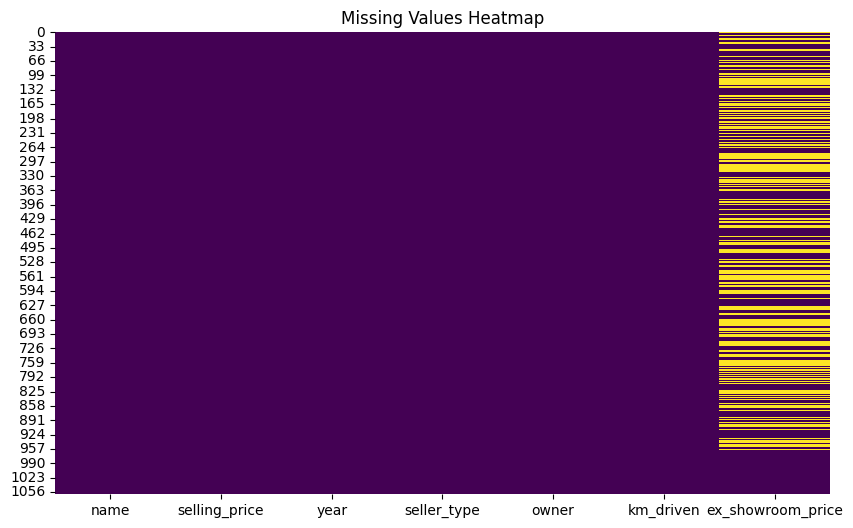

In [ ]:
#Que 7.What is the trend of missing values across the datasetD

# Check for missing values in each column
missing_values = data_bike.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data_bike)) * 100

# Print the results
print("Missing Values Trend:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

# Visualize the trend (optional)
plt.figure(figsize=(10, 6))
sns.heatmap(data_bike.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#Que 8. What is the highest ex_showroom_price recorded, and for which bikeD

# Find the highest ex_showroom_price and the corresponding bike details
highest_price_bike = data_bike.loc[data_bike['ex_showroom_price'].idxmax()]

print("Highest ex_showroom_price:", highest_price_bike['ex_showroom_price'])
print("Bike details:", highest_price_bike)

Highest ex_showroom_price: 1278000.0
Bike details: name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [ ]:
#Que 9. What is the total number of bikes listed by each seller typeD

data_bike.groupby('seller_type')['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

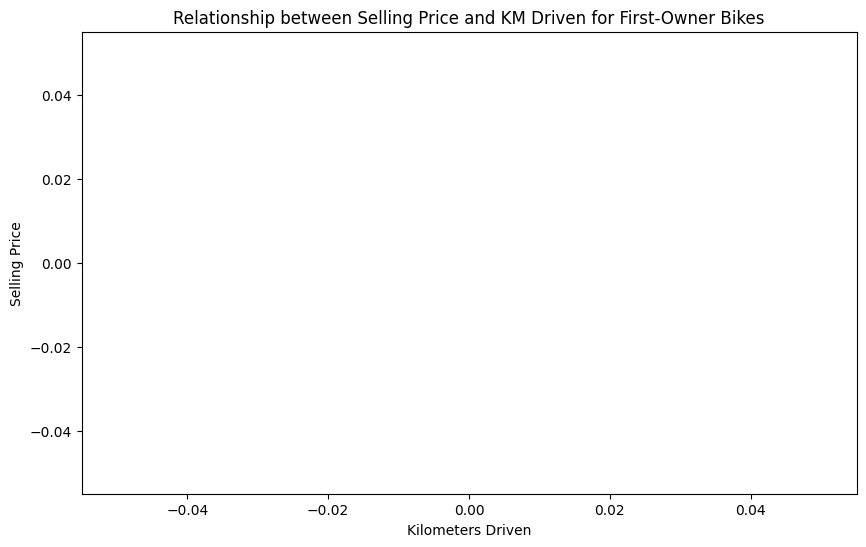

In [ ]:
#Que 10. What is the relationship between selling_price and km_driven for first-owner bikesD

# Assuming 'data_bike' DataFrame is already loaded as in the provided code.

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=data_bike[data_bike['owner'] == 'First Owner'])
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#Que 11. Identify and remove outliers in the km_driven column using the IQR methodB

# Calculate Q1, Q3, and IQR
Q1 = data_bike['km_driven'].quantile(0.25)
Q3 = data_bike['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_bike[(data_bike['km_driven'] < lower_bound) | (data_bike['km_driven'] > upper_bound)]

# Remove outliers
data_bike_no_outliers = data_bike[(data_bike['km_driven'] >= lower_bound) & (data_bike['km_driven'] <= upper_bound)]

# Print some info (optional)
print("Number of outliers:", len(outliers))
print("Number of data points before outlier removal:", len(data_bike))
print("Number of data points after outlier removal:", len(data_bike_no_outliers))

Number of outliers: 39
Number of data points before outlier removal: 1061
Number of data points after outlier removal: 1022


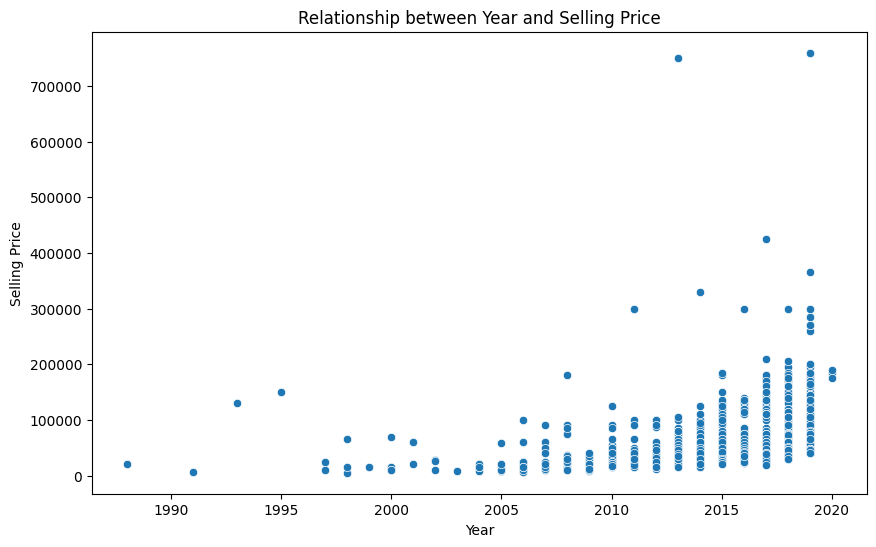

In [ ]:
#Que 12. Perform a bivariate analysis to visualize the relationship between year and selling_priceB

# Assuming 'data_bike' DataFrame is already loaded as in the provided code.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=data_bike)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

bike_age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


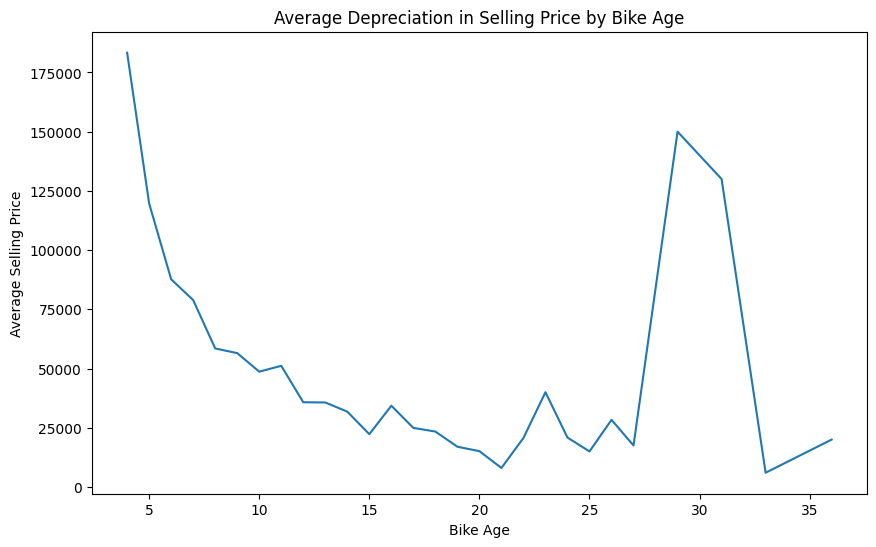

In [ ]:
#Que 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing

# Assuming 'data_bike' DataFrame is already loaded as in the provided code.

# Calculate the age of each bike
current_year = 2024  # Replace with the current year if needed
data_bike['bike_age'] = current_year - data_bike['year']

# Group the data by bike age and calculate the average depreciation in selling price
average_depreciation = data_bike.groupby('bike_age')['selling_price'].mean()

# Print or visualize the average depreciation
print(average_depreciation)

# Optional: Visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(average_depreciation.index, average_depreciation.values)
plt.xlabel('Bike Age')
plt.ylabel('Average Selling Price')
plt.title('Average Depreciation in Selling Price by Bike Age')
plt.show()

In [ ]:
#Que 14.  Which bike names are priced significantly above the average price for their manufacturing yearD

# Calculate the average selling price for each year
average_prices_by_year = data_bike.groupby('year')['selling_price'].mean()

# Identify bikes priced significantly above the average for their year
significantly_above_average = []
for index, row in data_bike.iterrows():
    year = row['year']
    selling_price = row['selling_price']
    average_price = average_prices_by_year[year]
    # You can adjust the threshold (e.g., 1.5 or 2 times the average) as needed
    if selling_price > average_price * 1.5 :
        significantly_above_average.append(row['name'])

print("Bikes priced significantly above average for their manufacturing year:")
significantly_above_average

Bikes priced significantly above average for their manufacturing year:


['Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Bullet 350 [2007-2011]',
 'Yamaha YZF R3',
 'Royal Enfield Classic Gunmetal Grey',
 'Jawa Standard',
 'Royal Enfield Thunderbird 350',
 'Honda CBR-250R',
 'Royal Enfield Thunderbird 350',
 'Bajaj Dominar 400',
 'KTM 390 Duke',
 'Royal Enfield Electra 5 S',
 'Royal Enfield Bullet 350',
 'Royal Enfield Thunderbird 350',
 'Royal Enfield Electra 4 S',
 'Mahindra Mojo XT300',
 'Hero Honda Karizma ZMR [2010]',
 'Royal Enfield Thunderbird 350X',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Classic Desert Storm',
 'Yamaha FZ25',
 'Royal Enfield Thunderbird 350',
 'UM Renegade Commando',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Classic 350',
 'Royal Enfield Continental GT 650',
 'Harley-Davidson Street Bob',
 'KTM 390 Duke ABS [2013-2016]',
 'Royal Enfield Classic 350',
 'Royal Enfield Classic 500',
 'Bajaj Dominar 400',
 'Royal Enfield Thunderbird 350X',
 'KTM RC 390',
 'Royal Enfield Thunderbird 350',
 'KTM 390 

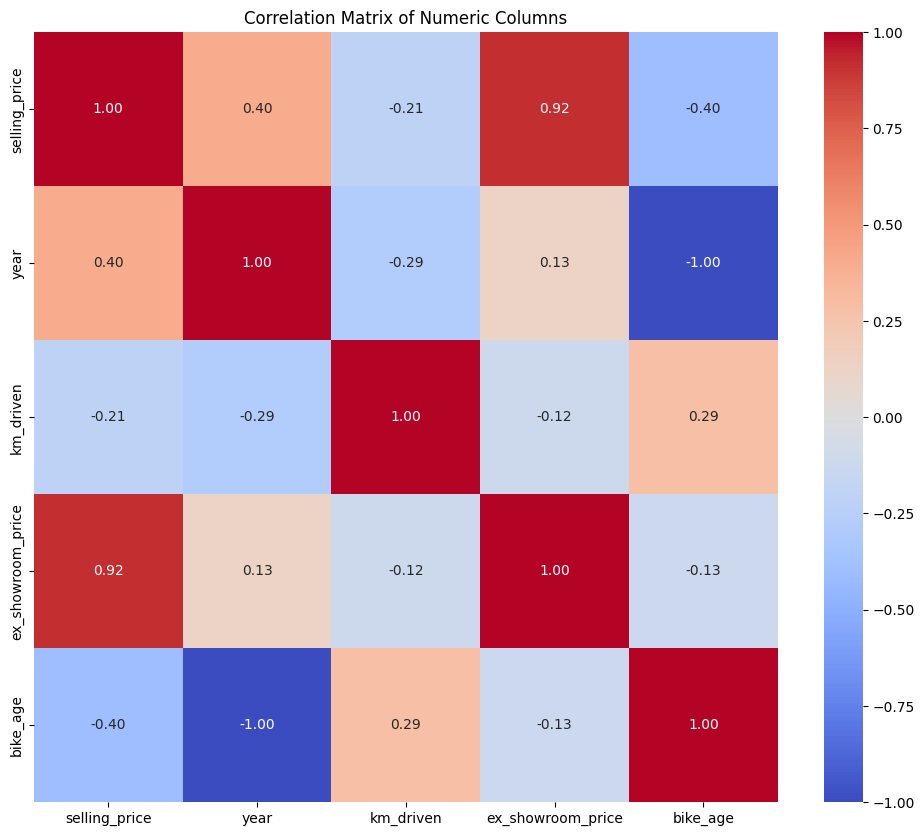

In [ ]:
#Que 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_bike' DataFrame is already loaded as in the provided code.

# Select only numeric columns for correlation analysis
numeric_cols = data_bike.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [ ]:
#EDA - 2

data_car = pd.read_csv("Car Sale.csv")


In [ ]:
data_car

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

Average Selling Price by Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.8

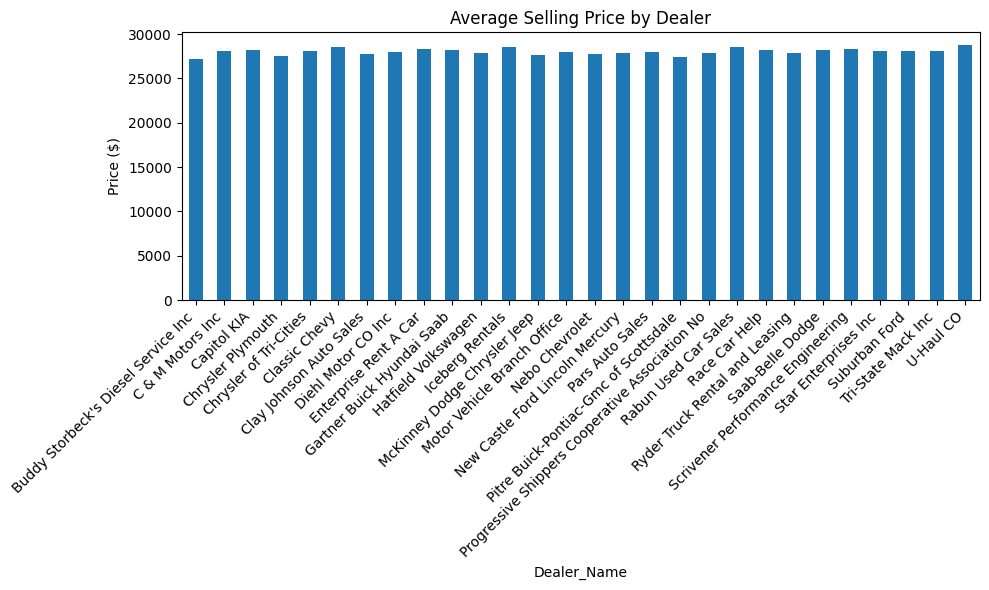

In [ ]:
#Que 1.  What is the average selling price of cars for each dealer, and how does it compare across different dealersE

# Calculate the average selling price for each dealer
average_selling_price_by_dealer = data_car.groupby('Dealer_Name')['Price ($)'].mean()

# Print the results
print("Average Selling Price by Dealer:\n", average_selling_price_by_dealer)

# Compare across dealers (example using a bar plot)
plt.figure(figsize=(10, 6))
average_selling_price_by_dealer.plot(kind='bar')
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer_Name')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Que 2. which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trendsE

# Calculate the standard deviation of prices for each car company
price_variation = data_car.groupby('Company')['Price ($)'].std()

# Find the company with the highest price variation
highest_variation_company = price_variation.idxmax()
highest_variation_amount = price_variation.max()

print(f"The car brand with the highest price variation is {highest_variation_company} with a standard deviation of {highest_variation_amount}.")

# Interpretation of the result
print("\nInterpretation:")
print(f"A high standard deviation in prices for {highest_variation_company} suggests a wide range of car models with varying features, conditions, and years of manufacture, leading to diverse price points within that brand. This could be due to a variety of factors such as model year, mileage, features (luxury vs basic), or overall condition.")

The car brand with the highest price variation is Lincoln with a standard deviation of 19658.050211265567.

Interpretation:
A high standard deviation in prices for Lincoln suggests a wide range of car models with varying features, conditions, and years of manufacture, leading to diverse price points within that brand. This could be due to a variety of factors such as model year, mileage, features (luxury vs basic), or overall condition.


                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  

Interquartile Ranges (IQR) of Prices by Transmission Type:
 Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


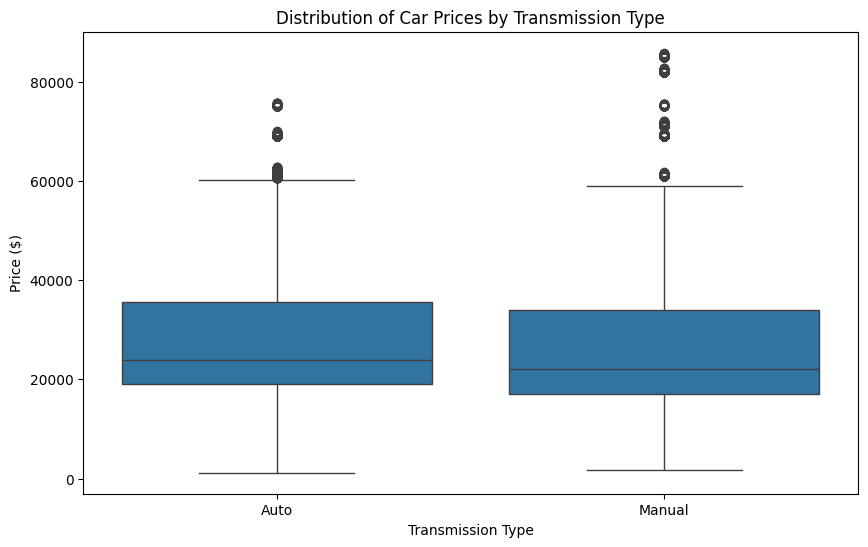

In [ ]:
#Que 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Group data by transmission type and get descriptive statistics of prices
price_stats_by_transmission = data_car.groupby('Transmission')['Price ($)'].describe()

print(price_stats_by_transmission)


# Calculate interquartile ranges (IQR) for each transmission type
price_iqr_by_transmission = data_car.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("\nInterquartile Ranges (IQR) of Prices by Transmission Type:\n", price_iqr_by_transmission)


# Visualization (box plots are useful for showing distribution and IQR)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=data_car)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

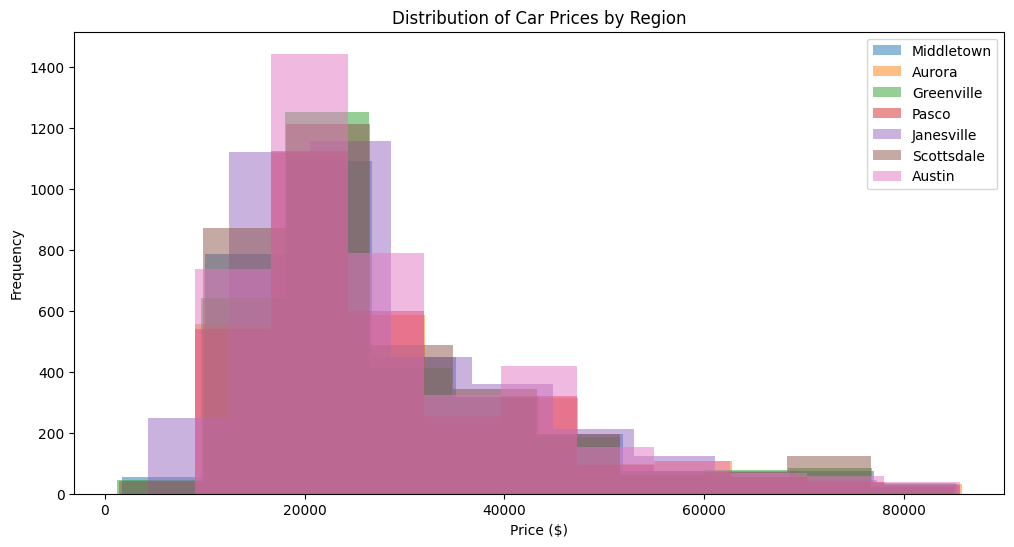

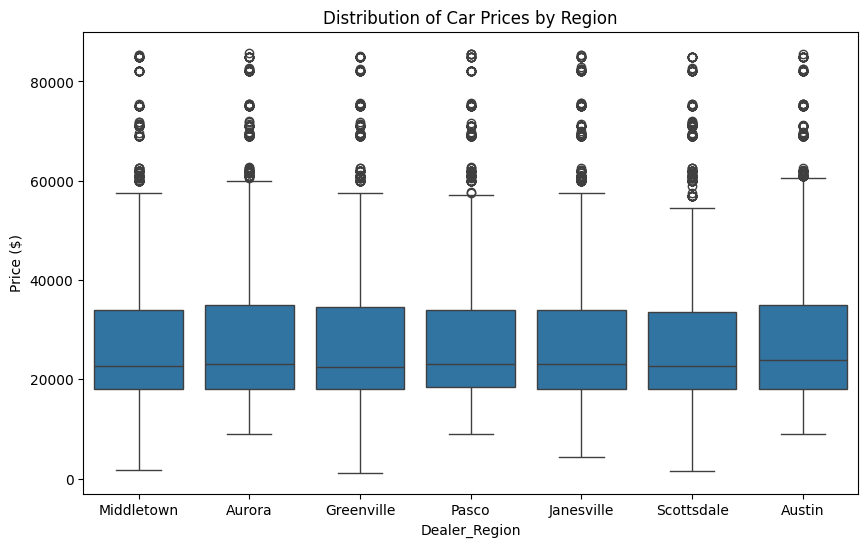

In [ ]:
#Que 4. What is the distribution of car prices across different regionsE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Group data by region and get descriptive statistics of prices
price_stats_by_region = data_car.groupby('Dealer_Region')['Price ($)'].describe()

print(price_stats_by_region)

# Visualization (histograms or box plots are useful for showing price distribution by region)

# Histograms
plt.figure(figsize=(12, 6))
for region in data_car['Dealer_Region'].unique():
    plt.hist(data_car[data_car['Dealer_Region'] == region]['Price ($)'], alpha=0.5, label=region)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data_car)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.show()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


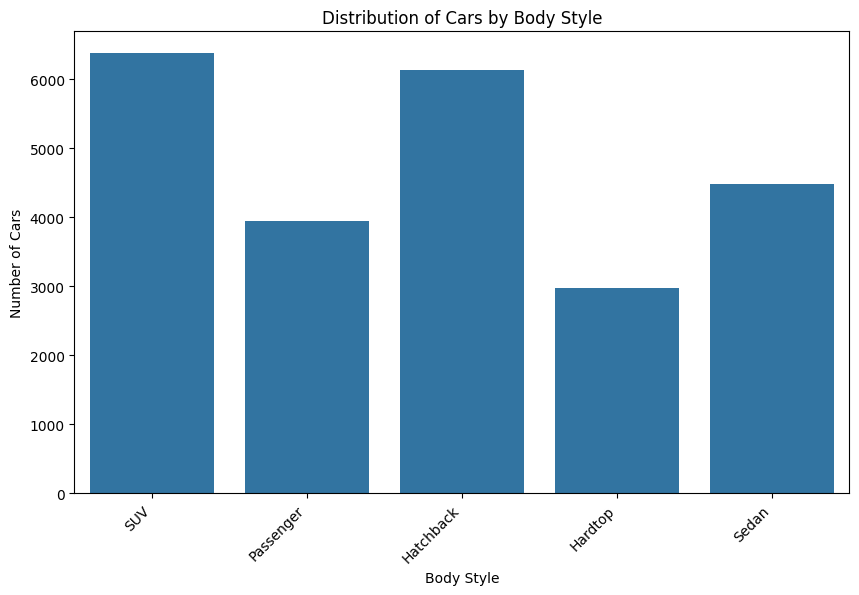

In [ ]:
#Que 5. What is the distribution of cars based on body stylesE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the car sales data
data_car = pd.read_csv("Car Sale.csv")

# Assuming 'Body_Style' is the column representing car body styles
# Check if the column exists
if 'Body Style' in data_car.columns:
    # Count the occurrences of each body style
    body_style_counts = data_car['Body Style'].value_counts()

    # Print the distribution
    print(body_style_counts)

    # Visualize the distribution using a bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Body Style', data=data_car)
    plt.title('Distribution of Cars by Body Style')
    plt.xlabel('Body Style')
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
else:
    print("Error: 'Body Style' column not found in the dataset.")

      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


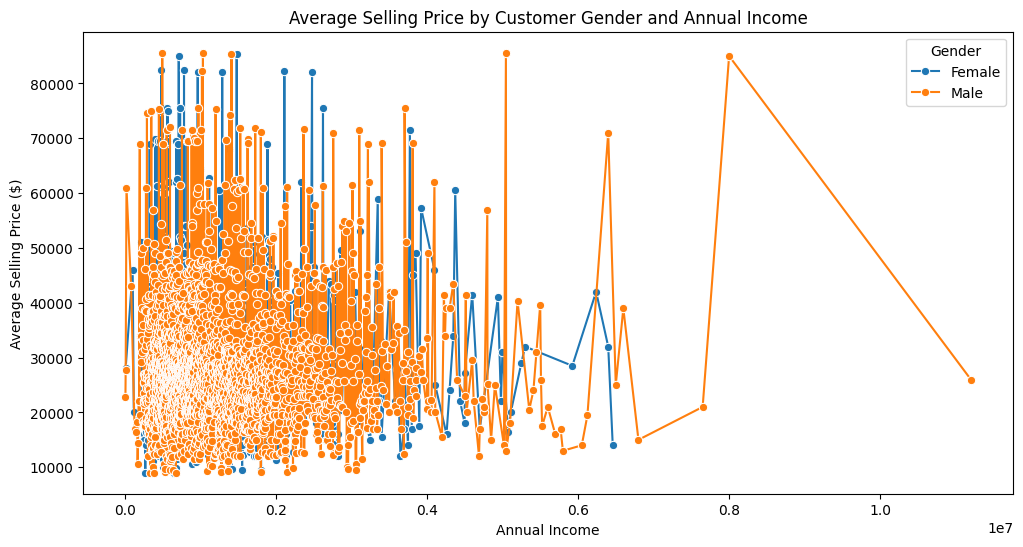

In [ ]:
#Que 6. How does the average selling price of cars vary by customer gender and annual incomeE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Group data by customer gender and annual income, then calculate the average selling price
average_price_by_gender_income = data_car.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

# Print the results
print(average_price_by_gender_income)

# Visualization (you can customize the plot as needed)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Changed 'Annual Income ' to 'Annual Income' to match the column name in the DataFrame.
sns.lineplot(x='Annual Income', y='Price ($)', hue='Gender', data=average_price_by_gender_income, marker='o')
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price ($)')
plt.show()

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

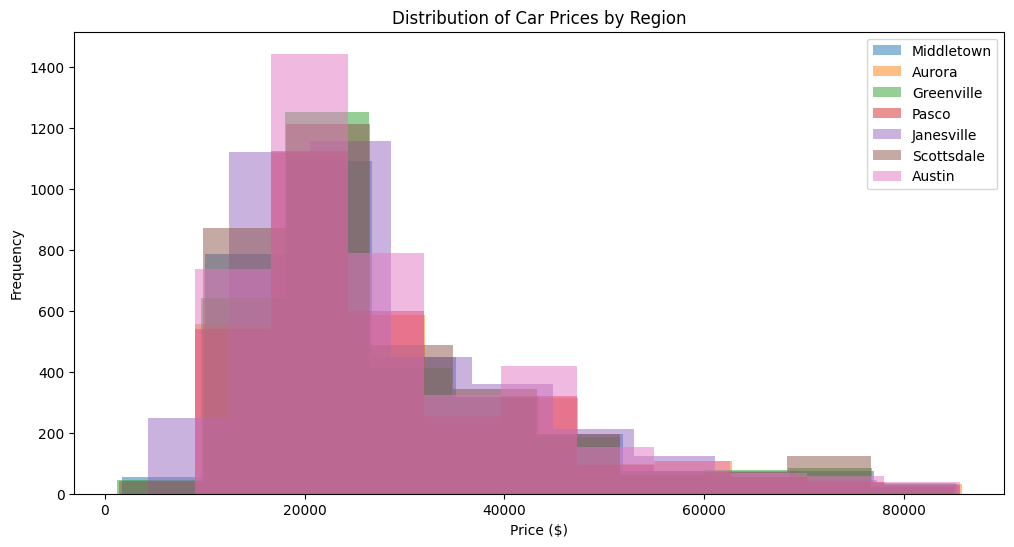

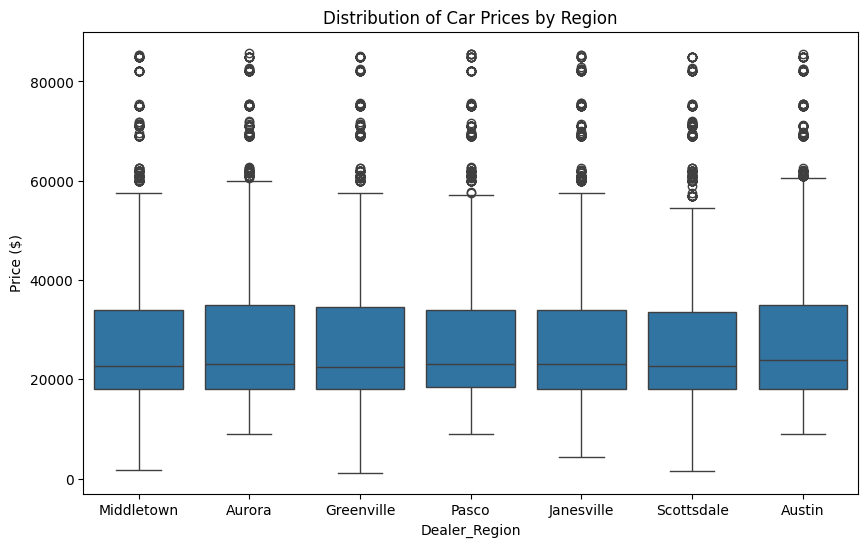

In [ ]:
#Que 7. What is the distribution of car prices by region, and how does the number of cars sold vary by regionE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Group data by region and get descriptive statistics of prices
price_stats_by_region = data_car.groupby('Dealer_Region')['Price ($)'].describe()

print(price_stats_by_region)

# Number of cars sold per region
cars_sold_by_region = data_car.groupby('Dealer_Region')['Price ($)'].count()
print("\nNumber of Cars Sold by Region:\n", cars_sold_by_region)


# Visualization (histograms or box plots are useful for showing price distribution by region)

# Histograms
plt.figure(figsize=(12, 6))
for region in data_car['Dealer_Region'].unique():
    plt.hist(data_car[data_car['Dealer_Region'] == region]['Price ($)'], alpha=0.5, label=region)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data_car)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.show()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


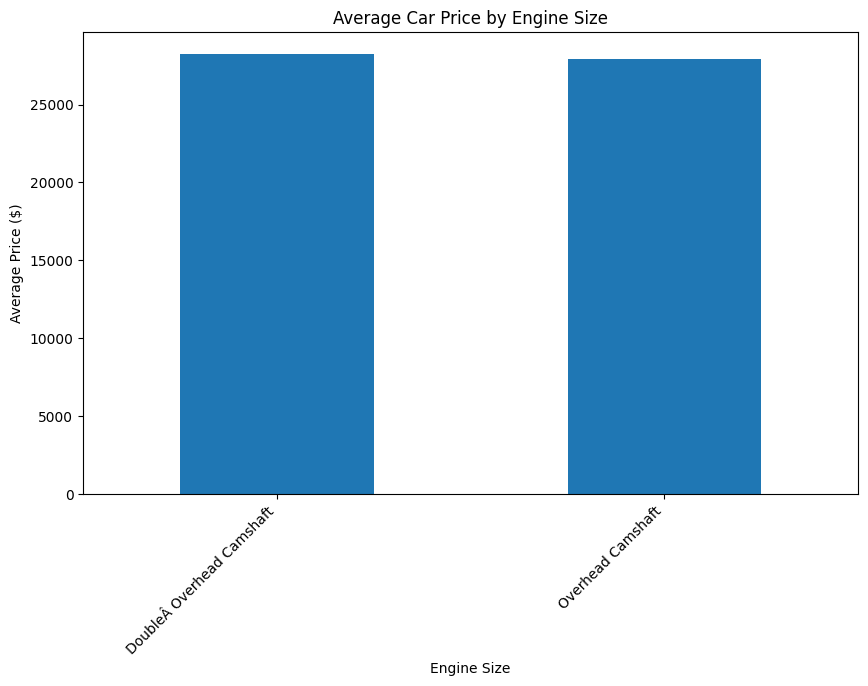

In [ ]:
#Que 8. How does the average car price differ between cars with different engine sizesE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Assuming 'Engine Size' is a column in your dataset
if 'Engine' in data_car.columns:
    # Group the data by engine size and calculate the average selling price
    average_price_by_engine_size = data_car.groupby('Engine')['Price ($)'].mean()

    # Print the results
    print(average_price_by_engine_size)

    # Visualization (you can choose a different visualization if needed)
    plt.figure(figsize=(10, 6))
    average_price_by_engine_size.plot(kind='bar')
    plt.title('Average Car Price by Engine Size')
    plt.xlabel('Engine Size')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Error: 'Engine Size' column not found in the dataset.")

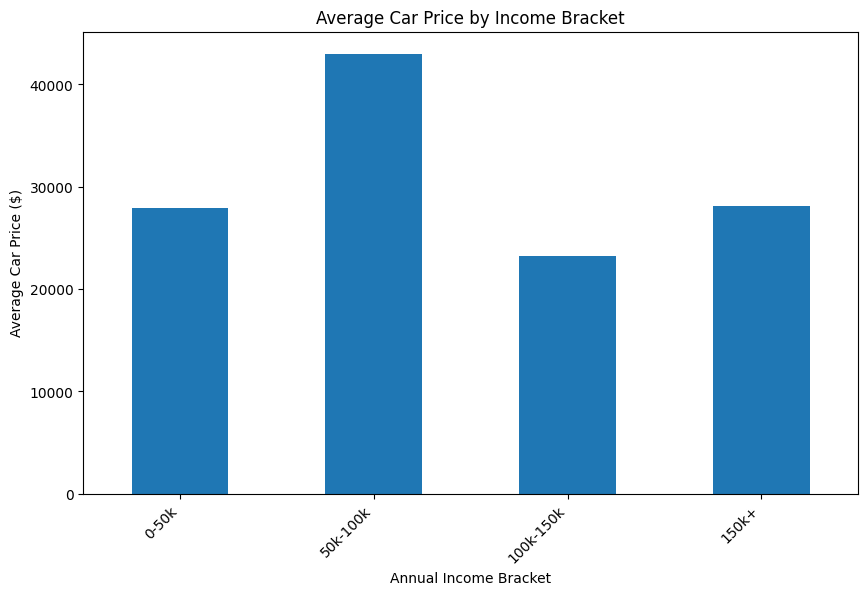

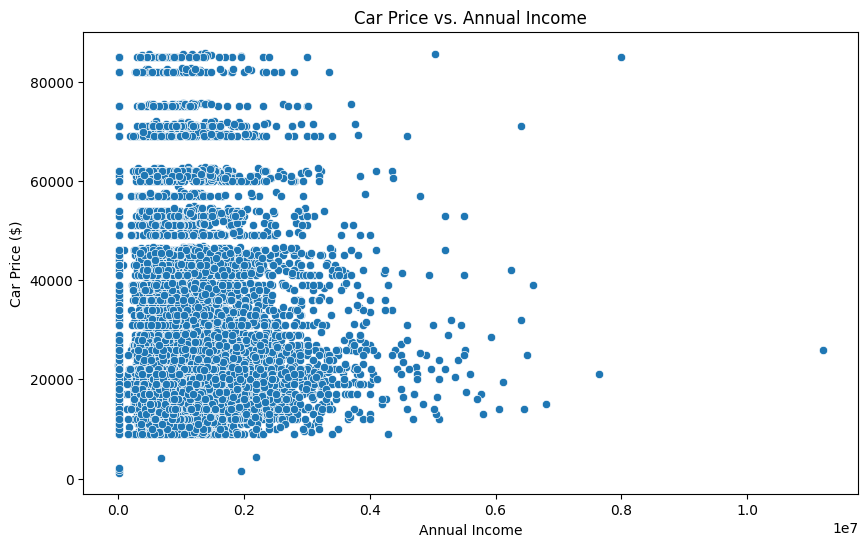

In [ ]:
#Que 9. How do car prices vary based on the customer’s annual income bracketE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.
# and that 'Annual Income' is a numerical column representing annual income.

import matplotlib.pyplot as plt
import seaborn as sns

# Create income brackets (adjust these as needed)
income_brackets = [0, 50000, 100000, 150000, float('inf')]  # Example brackets: 0-50k, 50k-100k, 100k-150k, 150k+
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k+']

# Categorize customers into income brackets
data_car['Income Bracket'] = pd.cut(data_car['Annual Income'], bins=income_brackets, labels=income_labels, right=False)

# Group by income bracket and calculate the average car price
average_price_by_income_bracket = data_car.groupby('Income Bracket')['Price ($)'].mean()


# Visualization
plt.figure(figsize=(10, 6))
average_price_by_income_bracket.plot(kind='bar')
plt.title('Average Car Price by Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


#Further analysis (optional):  You can examine the relationship between income brackets and prices using a scatterplot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=data_car)
plt.title('Car Price vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.show()

Top 5 car models with the highest number of sales:
 Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


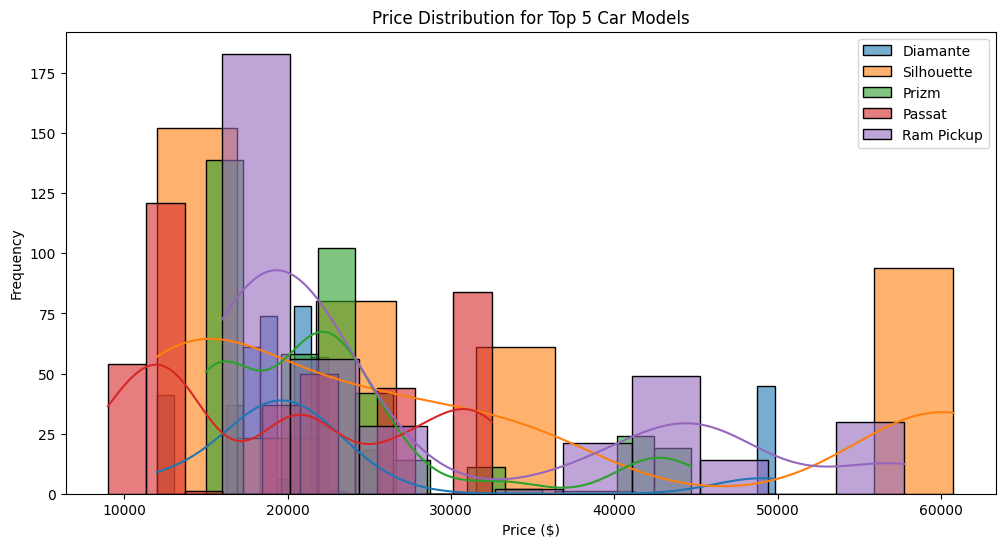

In [ ]:
#Que 10 .What are the top 5 car models with the highest number of sales, and how does their price distribution lookE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the car sales data
data_car = pd.read_csv("Car Sale.csv")

# Top 5 car models with the highest number of sales
top_5_models = data_car['Model'].value_counts().head(5)
print("Top 5 car models with the highest number of sales:\n", top_5_models)

# Price distribution for the top 5 models
plt.figure(figsize=(12, 6))
for model in top_5_models.index:
    sns.histplot(data_car[data_car['Model'] == model]['Price ($)'], label=model, kde=True, alpha=0.6)
plt.title('Price Distribution for Top 5 Car Models')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The car color with the highest price variation is Red with a standard deviation of 15519.360962404155.


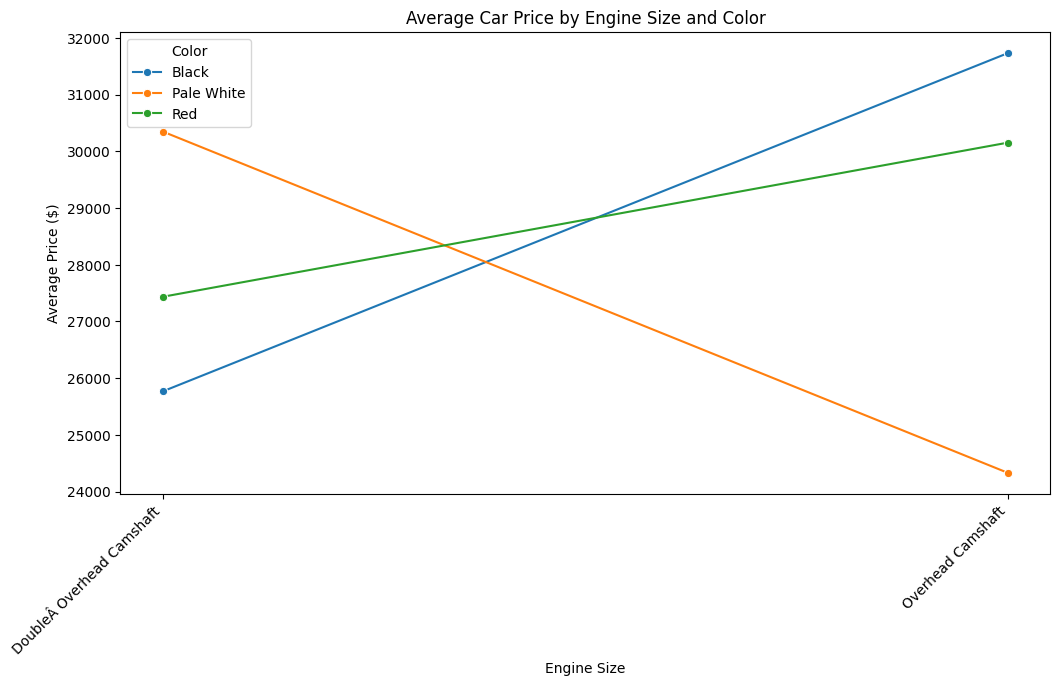

In [ ]:
#Que 11. How does car price vary with engine size across different car colors, and which colors have the highest price
# variationE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

import matplotlib.pyplot as plt
import seaborn as sns

# Check if necessary columns exist
if 'Engine' in data_car.columns and 'Color' in data_car.columns and 'Price ($)' in data_car.columns:
    # Group data by engine size and color, then calculate the average price
    average_price_by_engine_color = data_car.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()

    # Calculate price variation for each color
    price_variation_by_color = data_car.groupby('Color')['Price ($)'].std()

    # Find the color with the highest price variation
    color_highest_variation = price_variation_by_color.idxmax()
    highest_variation_amount = price_variation_by_color.max()

    print(f"The car color with the highest price variation is {color_highest_variation} with a standard deviation of {highest_variation_amount}.")


    # Visualization
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Engine', y='Price ($)', hue='Color', data=average_price_by_engine_color, marker='o')
    plt.title('Average Car Price by Engine Size and Color')
    plt.xlabel('Engine Size')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

else:
    print("Error: 'Engine Size', 'Color', or 'Price ($)' column not found in the dataset.")

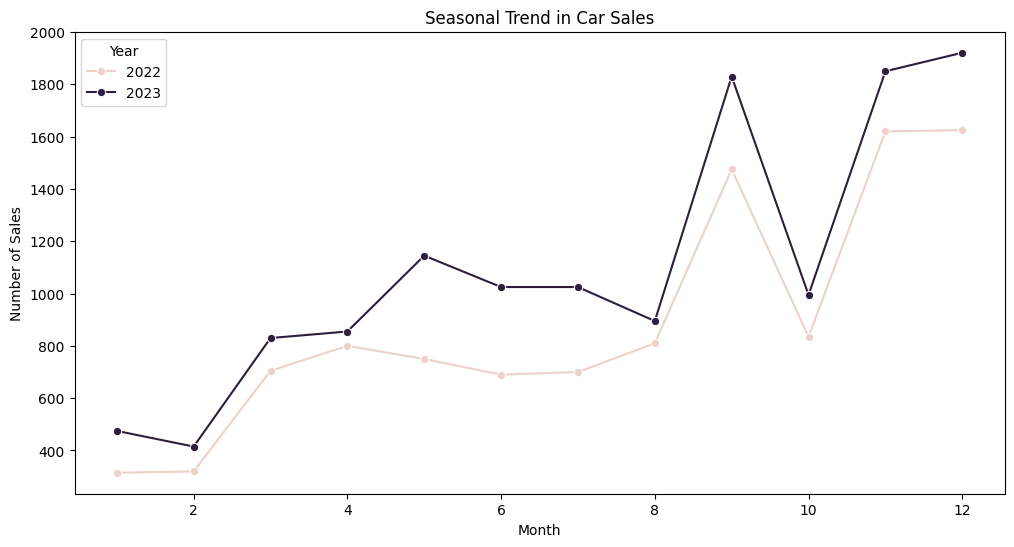

In [ ]:
#Que 12. Is there any seasonal trend in car sales based on the date of saleE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the car sales data
data_car = pd.read_csv("Car Sale.csv")

# Convert 'Date' column to datetime objects
data_car['Date'] = pd.to_datetime(data_car['Date'])

# Extract month and year from the date
data_car['Month'] = data_car['Date'].dt.month
data_car['Year'] = data_car['Date'].dt.year

# Group by month and year, then count the number of sales
sales_by_month = data_car.groupby(['Year', 'Month'])['Price ($)'].count().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Price ($)', hue='Year', data=sales_by_month, marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

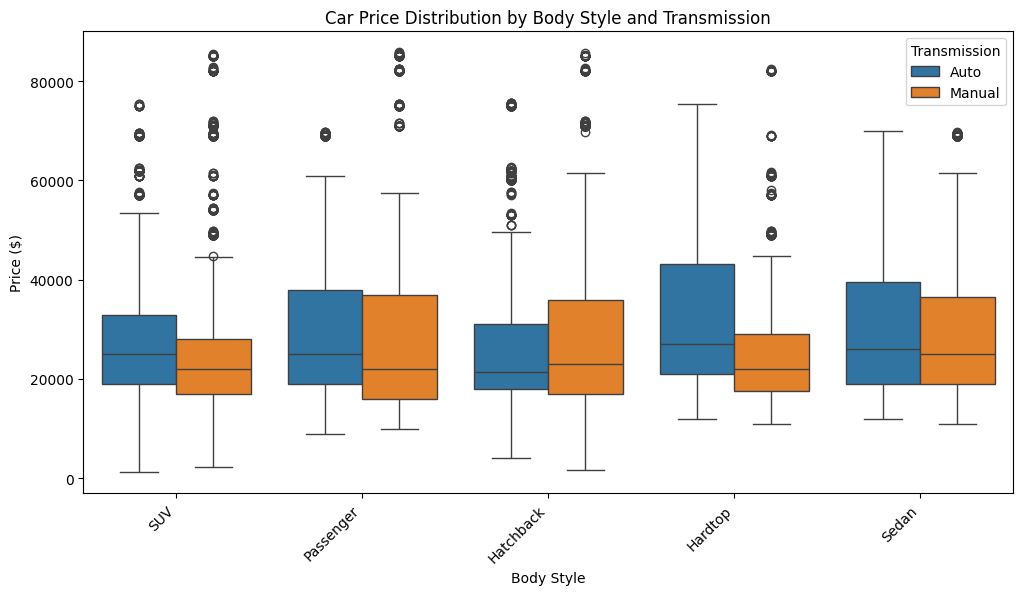

In [ ]:
#Que 13. How does the car price distribution change when considering different combinations of body style and
# transmission typeE

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Group data by body style and transmission, then calculate descriptive statistics of prices
price_stats_by_body_transmission = data_car.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

print(price_stats_by_body_transmission)

# Visualization (box plots are useful for showing distribution and IQR)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data_car)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

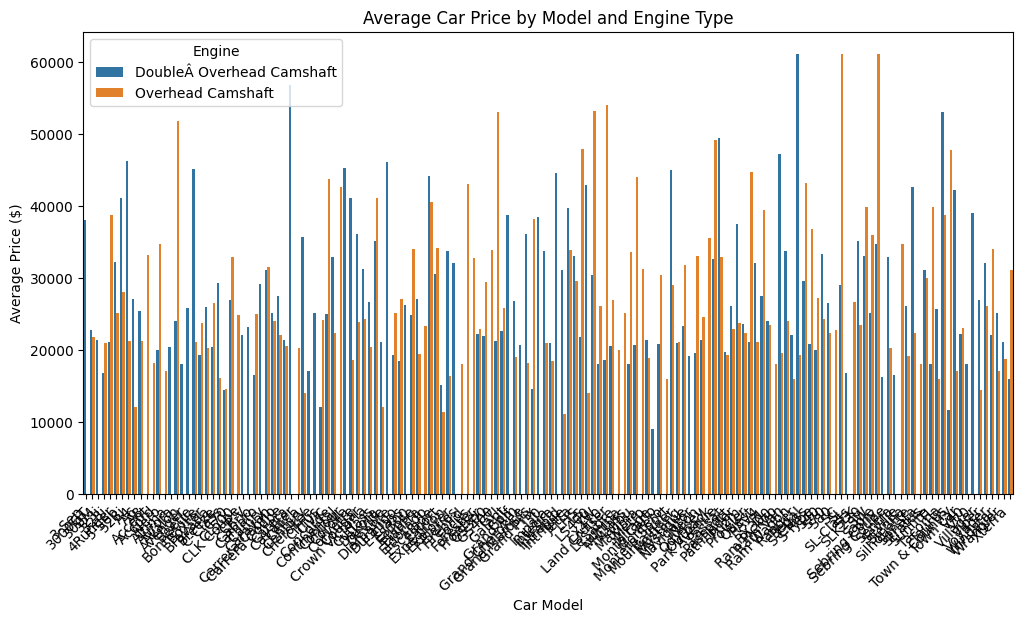

In [ ]:
#Que 15.How does the average car price vary across different car models and engine types?

# Assuming 'data_car' DataFrame is already loaded as in the provided code.

# Check if necessary columns exist
if 'Model' in data_car.columns and 'Engine' in data_car.columns and 'Price ($)' in data_car.columns:
    # Group data by model and engine type, then calculate the average price
    average_price_by_model_engine = data_car.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Price ($)', hue='Engine', data=average_price_by_model_engine)
    plt.title('Average Car Price by Model and Engine Type')
    plt.xlabel('Car Model')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Error: 'Model', 'Engine', or 'Price ($)' column not found in the dataset.")

In [3]:
#amazon data set for the eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [4]:
data_amazon = pd.read_csv("amazon.csv")

In [5]:
data_amazon

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [9]:
#Que 1. What is the average rating for each product categoryk

# Assuming 'data_amazon' DataFrame is already loaded and contains a 'category' column and a 'rating' column.

# Convert the 'rating' column to numeric, handling potential errors
data_amazon['rating'] = pd.to_numeric(data_amazon['rating'], errors='coerce')

# Calculate the average rating for each product category
average_rating_by_category = data_amazon.groupby('category')['rating'].mean()

# Print the results
average_rating_by_category

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens     4.150000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens    4.300000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens          4.133333
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                     4.300000
Name: rating, Length: 211, dtype: float64

In [11]:
#Que 2. What are the top rating_count products by categoryk

# Assuming 'data_amazon' DataFrame is already loaded and contains a 'category' column, a 'rating' column, and a 'rating_count' column.

# Convert the 'rating' and 'rating_count' columns to numeric, handling potential errors
data_amazon['rating'] = pd.to_numeric(data_amazon['rating'], errors='coerce')
data_amazon['rating_count'] = pd.to_numeric(data_amazon['rating_count'], errors='coerce')

# Sort the data within each category by rating_count in descending order
data_amazon_sorted = data_amazon.sort_values(['category', 'rating_count'], ascending=[True, False])

# Get the top products by rating_count for each category
top_products_by_category = data_amazon_sorted.groupby('category').head(5) # Get top 5, change as needed

# Display the results
print(top_products_by_category[['category', 'product_name', 'rating_count']])

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
742   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
858   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
919   OfficeProducts|OfficePaperProducts|Paper|Stati...   
955   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...           NaN  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...           NaN  
742   Kanget [2 Pack] Type C Female to USB A Male Ch...           NaN  
906

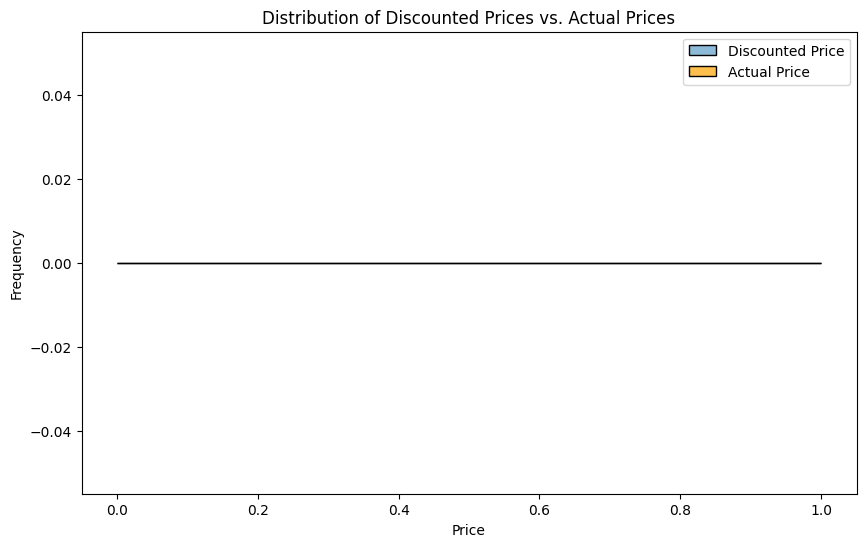

Discounted Price Statistics:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: discounted_price, dtype: float64

Actual Price Statistics:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: actual_price, dtype: float64


In [14]:
#Que 3. What is the distribution of discounted prices vs. actual pricesk data_amazon

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Amazon data
data_amazon = pd.read_csv("amazon.csv")

# Convert 'discounted_price' and 'actual_price' to numeric, handling errors
data_amazon['discounted_price'] = pd.to_numeric(data_amazon['discounted_price'], errors='coerce')
data_amazon['actual_price'] = pd.to_numeric(data_amazon['actual_price'], errors='coerce')


# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data_amazon['discounted_price'], label='Discounted Price', kde=True)
sns.histplot(data_amazon['actual_price'], label='Actual Price', kde=True, color='orange', alpha = 0.7)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate and print the descriptive statistics for both price columns
print("Discounted Price Statistics:\n", data_amazon['discounted_price'].describe())
print("\nActual Price Statistics:\n", data_amazon['actual_price'].describe())

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

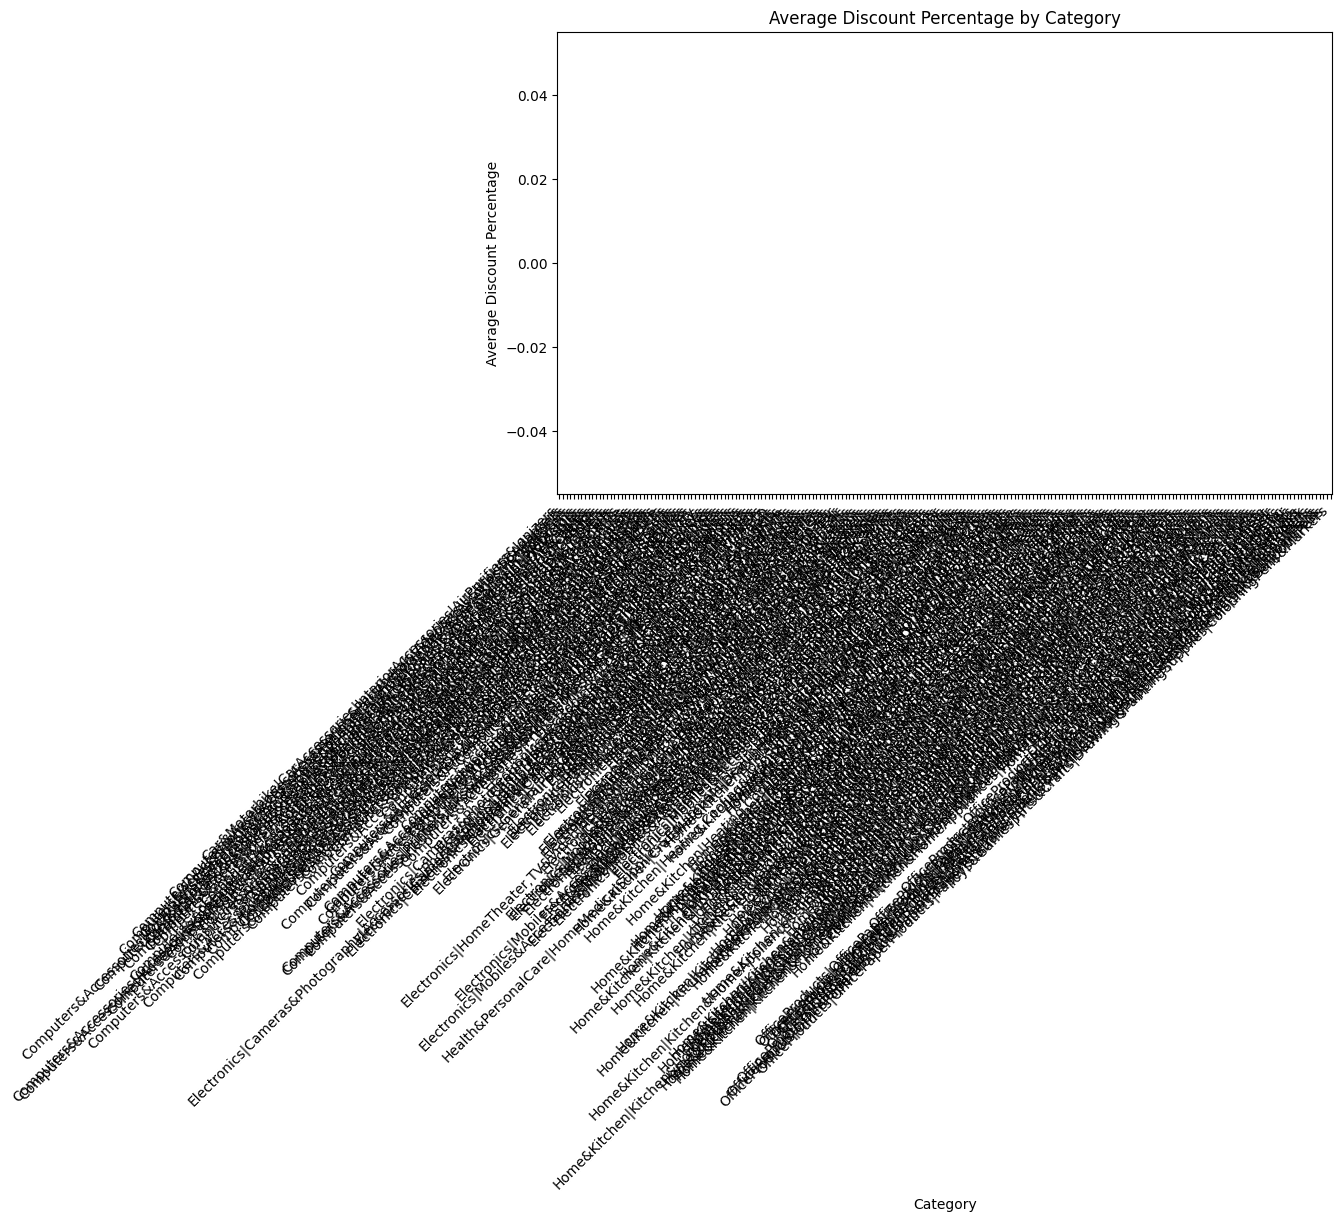

In [15]:
#Que 4 How does the average discount percentage vary across categoriesk

# Assuming 'data_amazon' DataFrame is already loaded and contains 'category', 'discounted_price', and 'actual_price' columns.

# Convert relevant columns to numeric, handling errors
data_amazon['discounted_price'] = pd.to_numeric(data_amazon['discounted_price'], errors='coerce')
data_amazon['actual_price'] = pd.to_numeric(data_amazon['actual_price'], errors='coerce')

# Calculate discount percentage
data_amazon['discount_percentage'] = ((data_amazon['actual_price'] - data_amazon['discounted_price']) / data_amazon['actual_price']) * 100

# Group by category and calculate the average discount percentage
average_discount_by_category = data_amazon.groupby('category')['discount_percentage'].mean()

# Print the results
print(average_discount_by_category)

# Visualization (optional)
plt.figure(figsize=(10, 6))
average_discount_by_category.plot(kind='bar')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
#Que 5 What are the most popular product namesk

# Assuming 'data_amazon' DataFrame is already loaded as in the provided code.

# Find the most popular product names (top 10 by rating count, for example)
top_products = data_amazon.sort_values('rating_count', ascending=False).head(10)

# Display the product names and their rating counts
print("Top 10 Most Popular Product Names:")
print(top_products[['product_name', 'rating_count']])

Top 10 Most Popular Product Names:
                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


In [17]:
#Que 6.  What are the most popular product keywordsk?

# Assuming 'data_amazon' DataFrame is already loaded as in the provided code.

# Assuming you want the most frequent keywords in the 'product_name' column.
from collections import Counter

# Combine all product names into a single string
all_product_names = ' '.join(data_amazon['product_name'].astype(str).tolist()).lower()  # Lowercase for consistency

# Tokenize the combined string (split into words) and remove punctuation
import re
words = re.findall(r'\b\w+\b', all_product_names)

# Count word frequencies
word_counts = Counter(words)

# Get the most frequent words (excluding common stop words)
stop_words = {'the', 'a', 'an', 'and', 'of', 'to', 'in', 'for', 'with', 'on', 'is', 'are', 'as', 'at', 'by', 'it', 'its', 'that', 'this', 'be', 'have', 'has', 'from', 'or', 'an'}
most_frequent_words = [word for word, count in word_counts.most_common(20) if word not in stop_words] # Adjust 20 for more/less frequent words

# Display the most popular product keywords
print("Most popular product keywords:", most_frequent_words)

Most popular product keywords: ['black', 'usb', 'cable', '1', 'c', '3', '2', 'charging', 'type', 'fast', 'smart', 'white', 'tv', 'compatible', '5']


Top 5 Products by Rating Count:
                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0


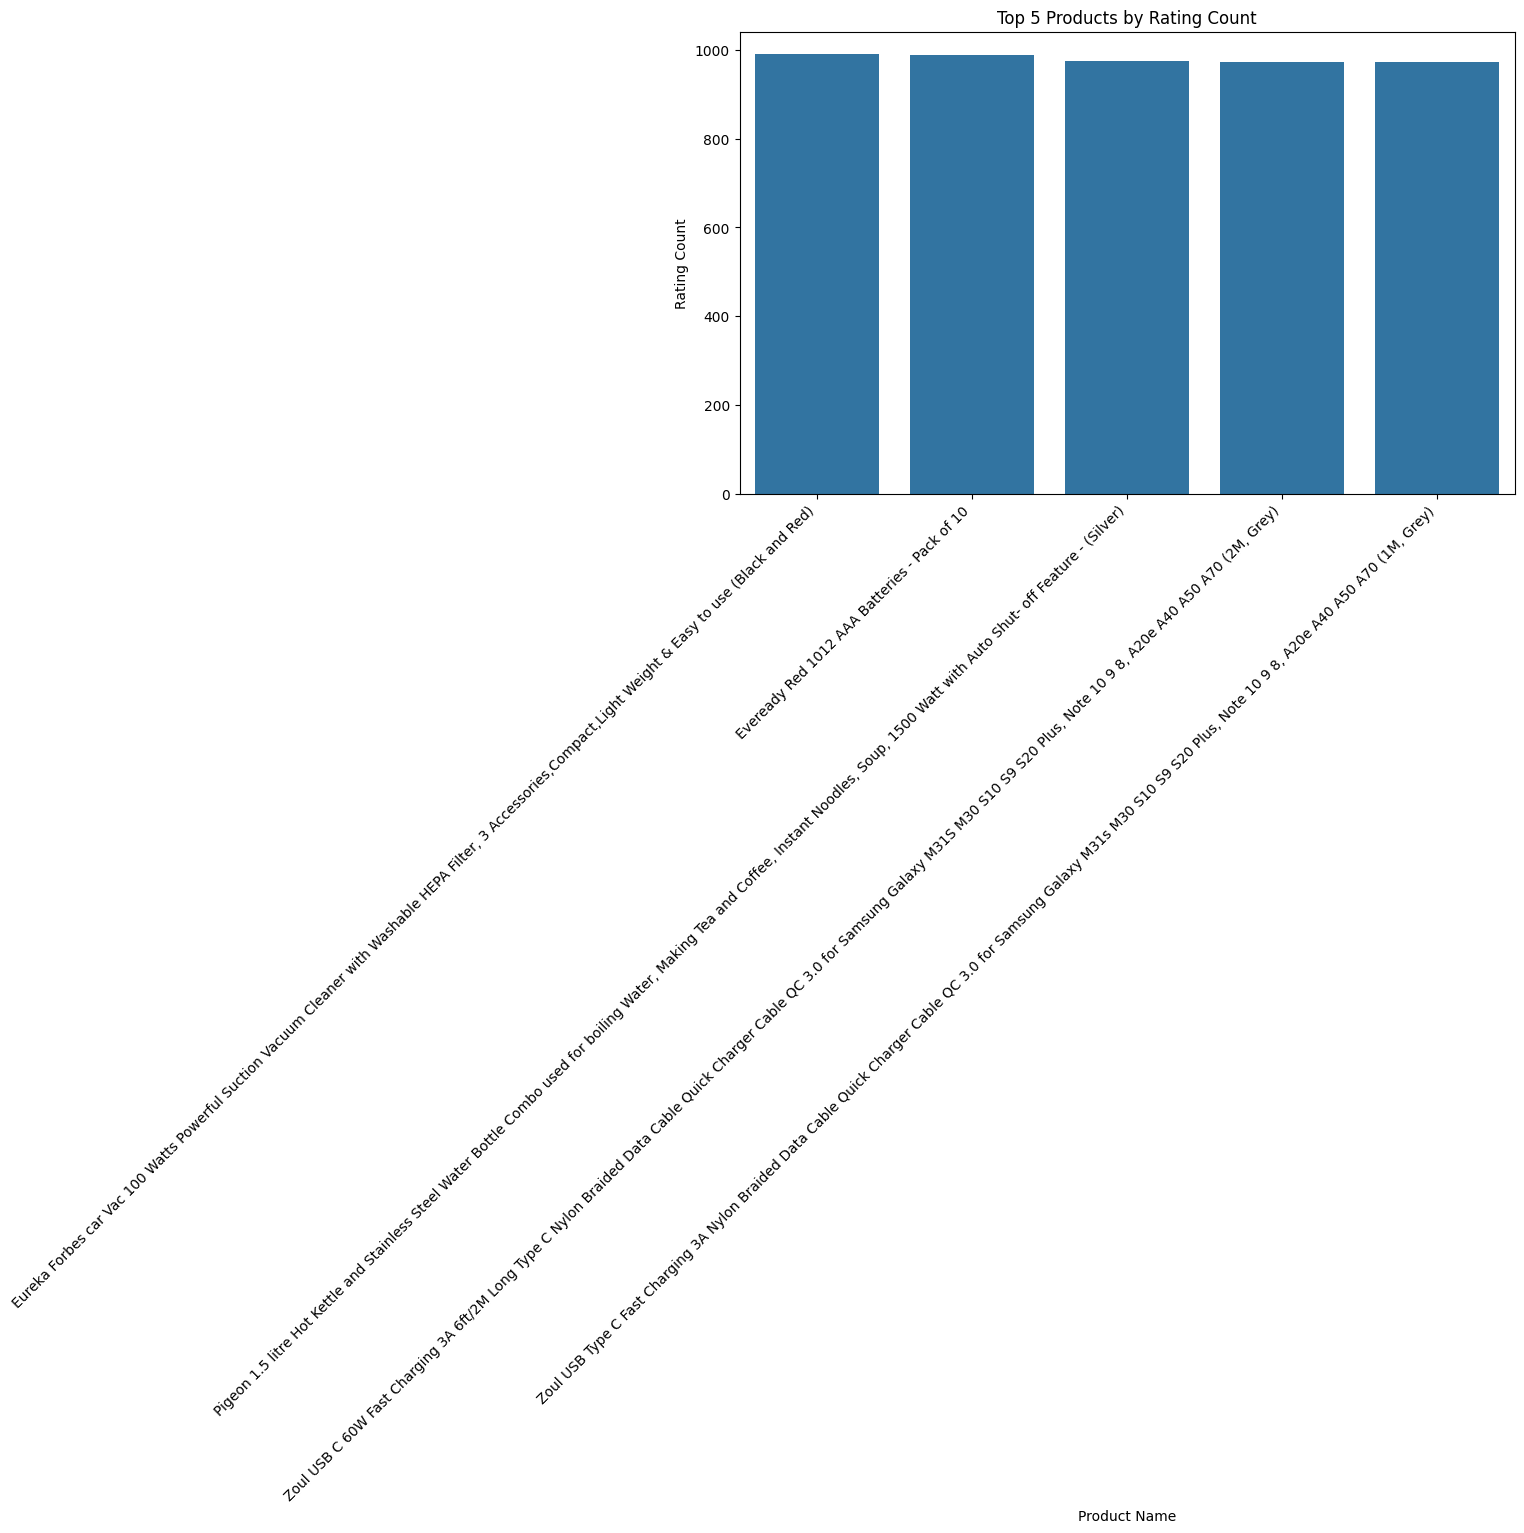

In [19]:
# prompt: What are the most popular product reviewsk

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load the Amazon data (assuming it's in a file named 'amazon.csv')
data_amazon = pd.read_csv("amazon.csv")

# Convert 'rating_count' to numeric, handling errors
data_amazon['rating_count'] = pd.to_numeric(data_amazon['rating_count'], errors='coerce')

# Assuming 'product_name' and 'rating_count' are columns in your DataFrame

# Calculate the top 5 products with the highest rating counts
top_products = data_amazon.nlargest(5, 'rating_count')

# Print the top 5 products and their rating counts
print("Top 5 Products by Rating Count:")
print(top_products[['product_name', 'rating_count']])


# Optional: Visualize the top products
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='rating_count', data=top_products)
plt.title("Top 5 Products by Rating Count")
plt.xlabel("Product Name")
plt.ylabel("Rating Count")
plt.xticks(rotation=45, ha='right')
plt.show()

The correlation between discounted_price and rating is: nan


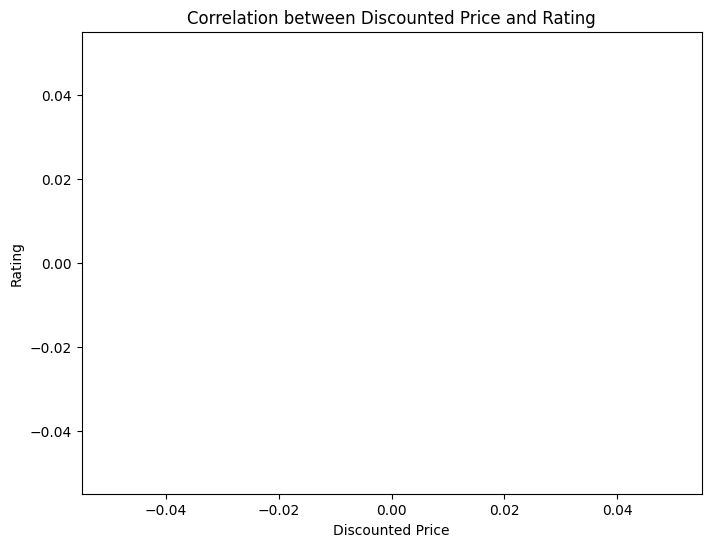

In [20]:
#Que 8. What is the correlation between discounted_price and ratingk

# Convert 'discounted_price' and 'rating' columns to numeric, handling errors
data_amazon['discounted_price'] = pd.to_numeric(data_amazon['discounted_price'], errors='coerce')
data_amazon['rating'] = pd.to_numeric(data_amazon['rating'], errors='coerce')

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = data_amazon['discounted_price'].corr(data_amazon['rating'])

# Print the correlation
print(f"The correlation between discounted_price and rating is: {correlation}")

# Visualization (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='rating', data=data_amazon)
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

In [21]:
#Que 9. What are the Top 5 categories based on the highest ratingsk

# Assuming 'data_amazon' DataFrame is already loaded and contains a 'category' column and a 'rating' column.

# Convert the 'rating' column to numeric, handling potential errors
data_amazon['rating'] = pd.to_numeric(data_amazon['rating'], errors='coerce')

# Group data by category and calculate the average rating
average_ratings = data_amazon.groupby('category')['rating'].mean()

# Sort the average ratings in descending order and get the top 5
top_5_categories = average_ratings.sort_values(ascending=False).head(5)

# Print the top 5 categories and their average ratings
top_5_categories

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

In [ ]:
#Que 10. Identify any potential areas for improvement or optimization based on the data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics as st
from collections import Counter
import re

# ... (Your existing code) ...

# Potential Improvements and Optimizations:

# 1. Data Cleaning and Preprocessing:
#    - Handle missing values more systematically. Instead of just ignoring errors with `errors='coerce'`,
#      investigate why data is missing. Decide whether to impute (fill in) missing values, remove rows/columns with missing data, or use more sophisticated imputation techniques.
#    - Consistent data types: Ensure all numerical columns are actually numeric.  Explicitly convert them to the appropriate types (int, float) instead of relying on pandas' inference.
#    - Outlier detection and treatment:  Visually inspect and identify outliers (e.g., extremely high or low prices, rating counts). Decide how to handle them – remove them, transform them (e.g., log transformation), or cap them. Outliers can disproportionately influence statistical measures and visualizations.
#    - Currency Consistency: Ensure that all prices are in the same currency before analysis or conversions are performed.


# 2. Feature Engineering:
#    - Create new features from existing ones that may be more informative for analysis.  Examples:
#       - 'Discount Amount':  Calculate the difference between actual price and discounted price.
#       - 'Price per Engine Size': Price divided by engine size (if engine size is a meaningful numerical value).
#       - More precise date features: Instead of just month and year, create features like 'day of week', 'quarter', 'is_holiday' (if applicable).
#       - Customer segmentation:  Group customers into segments based on income, purchase history, or other characteristics.

# 3. Visualization Enhancements:
#    - Improve plot aesthetics: Add titles, labels, axis limits, and legends to all plots for clarity.
#    - Use appropriate visualizations: Choose the most informative chart type for each analysis (e.g., scatter plots for correlations, box plots for distributions, line plots for time series trends).
#    - Reduce plot clutter: Remove unnecessary gridlines, background colors, or excessive annotations.


# 4. More Robust Statistical Analysis:
#    - Hypothesis testing: Use statistical tests to confirm or reject hypotheses about relationships in the data.
#    - Regression analysis:  Explore relationships between variables using regression models (linear, polynomial, etc.)
#    - ANOVA: Analyze the difference in means among different groups.


# 5. Code Structure and Comments:
#    - Function Definitions: Create functions to encapsulate repetitive code blocks (like the price/rating calculations), making your code cleaner and reusable.
#    - More detailed comments: Add more extensive comments to explain complex logic or assumptions made during analysis.
#    - Docstrings:  Include docstrings in functions to clearly describe their purpose, parameters, and return values.
#    - Error Handling:  Implement better error handling (try-except blocks) to gracefully deal with unexpected input or file issues, rather than just printing error messages.



#Example of improved outlier handling (replace with suitable method):
# def handle_outliers(data, column):
#     q1 = data[column].quantile(0.25)
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# data_amazon = handle_outliers(data_amazon, 'discounted_price')  #Apply to appropriate columns
# data_car = handle_outliers(data_car, 'Price ($)')

In [ ]:
#Data for the EDA of the spotfy and the

In [23]:
data_spotify =pd.read_csv("spotify.csv")

In [24]:
data_spotify

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [26]:
#Que 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful use spotify file

import pandas as pd
import numpy as np

# Load the Spotify data
data_spotify = pd.read_csv("spotify.csv")

# Check for null values
print("Null values:\n", data_spotify.isnull().sum())

# Handle null values (example: fill with mean for numerical columns)
numerical_cols = data_spotify.select_dtypes(include=np.number).columns
for col in numerical_cols:
    data_spotify[col] = data_spotify[col].fillna(data_spotify[col].mean())

# Check for duplicate rows
duplicate_rows = data_spotify[data_spotify.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))

# Handle duplicate rows (example: drop duplicates)
data_spotify = data_spotify.drop_duplicates()
print("\nNumber of rows after removing duplicates:", len(data_spotify))

#Further analysis can be performed here.

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Number of rows after removing duplicates: 413


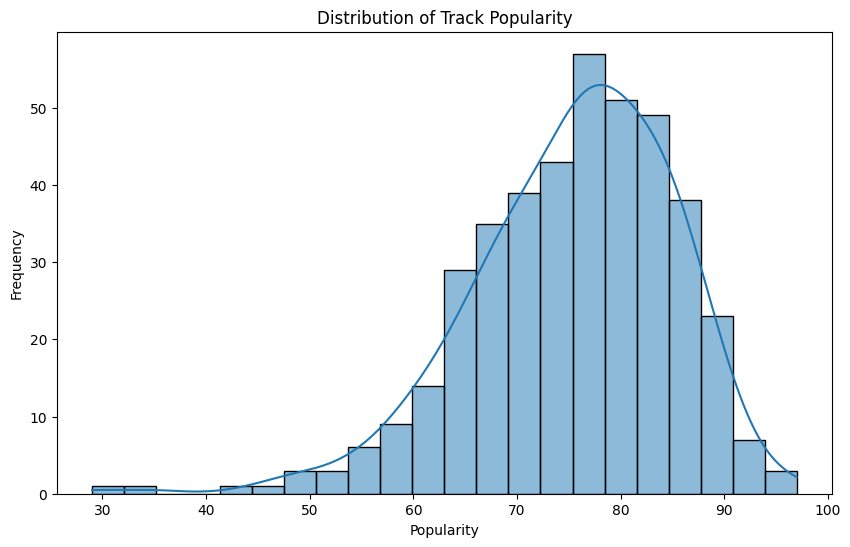

In [28]:
#Que 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_spotify' DataFrame is already loaded and contains a 'popularity' column.

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_spotify['Popularity'], kde=True)  # Use kde=True for a smoothed density curve
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

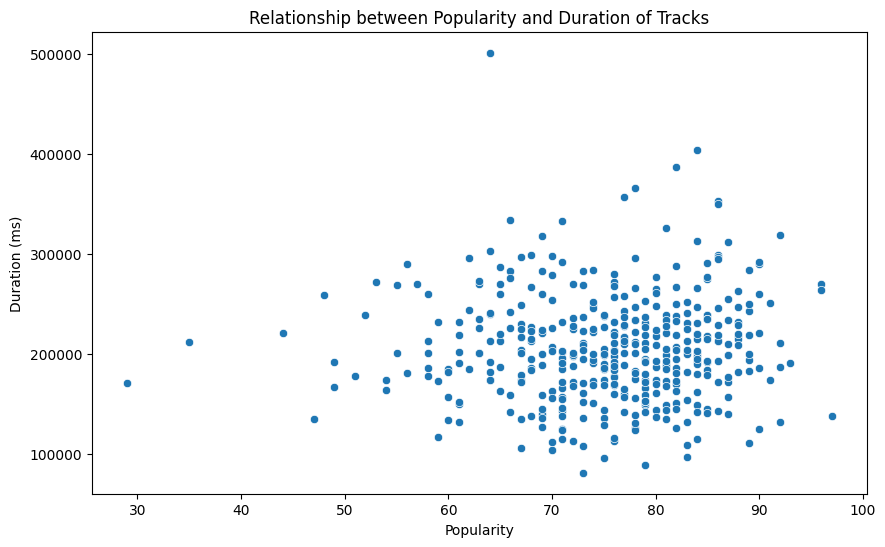

In [30]:
#Que 3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

# Assuming 'data_spotify' DataFrame is already loaded and contains 'Popularity' and 'Duration_ms' columns.

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=data_spotify)
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

The artist with the highest number of tracks is Drake with 20 tracks.


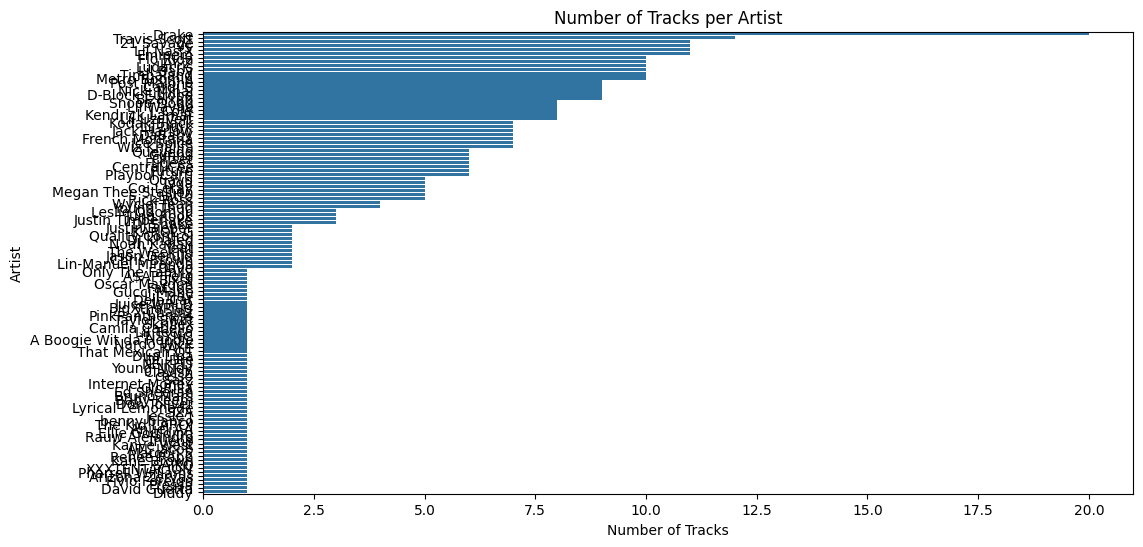

In [31]:
#Que 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Spotify data (assuming it's in a file named 'spotify.csv')
data_spotify = pd.read_csv("spotify.csv")

# Count the occurrences of each artist
artist_counts = data_spotify['Artist'].value_counts()

# Find the artist with the highest track count
highest_track_artist = artist_counts.index[0]
highest_track_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is {highest_track_artist} with {highest_track_count} tracks.")

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=data_spotify, order=artist_counts.index)  # Order bars by count
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [32]:
#Que 5.  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

# Assuming 'data_spotify' DataFrame is already loaded as in the provided code.

# Sort the DataFrame by popularity in ascending order and get the top 5
least_popular_tracks = data_spotify.nsmallest(5, 'Popularity')

# Display the artist name and track name for the least popular tracks
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name']])

Top 5 Least Popular Tracks:
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
435  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix


In [33]:
#Que 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist

import pandas as pd

# Assuming 'data_spotify' DataFrame is already loaded as in the provided code.
# Assuming 'Popularity' and 'Artist' columns exist in the dataframe.

# Group by artist and calculate the average popularity
average_popularity_by_artist = data_spotify.groupby('Artist')['Popularity'].mean()

# Get the top 5 artists by track count (replace with your actual method if different)
top_5_artists = data_spotify['Artist'].value_counts().nlargest(5).index

# Filter for the top 5 artists and sort by average popularity
top_artists_popularity = average_popularity_by_artist[top_5_artists].sort_values(ascending=False)

# Display the results
print(top_artists_popularity)

# The artist with the highest average popularity among the top 5 is the first one in the sorted list.
highest_popularity_artist = top_artists_popularity.index[0]
print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_popularity_artist}")

Artist
Travis Scott    87.000000
¥$              86.090909
21 Savage       84.181818
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: Travis Scott


In [34]:
#Que 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Assuming 'data_spotify' DataFrame is already loaded and contains 'Popularity', 'Artist', and 'Track Name' columns.

# Group by artist and sort by popularity in descending order
top_artists = data_spotify.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

# Create an empty dictionary to store the results
top_tracks_by_artist = {}

# Iterate through the top artists and find their most popular track
for artist in top_artists:
    artist_df = data_spotify[data_spotify['Artist'] == artist]
    most_popular_track = artist_df.loc[artist_df['Popularity'].idxmax(), 'Track Name']
    top_tracks_by_artist[artist] = most_popular_track

# Display the results
for artist, track in top_tracks_by_artist.items():
    print(f"Artist: {artist}, Most Popular Track: {track}")

Artist: cassö, Most Popular Track: Prada
Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole
Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: ¥$, Most Popular Track: CARNIVAL


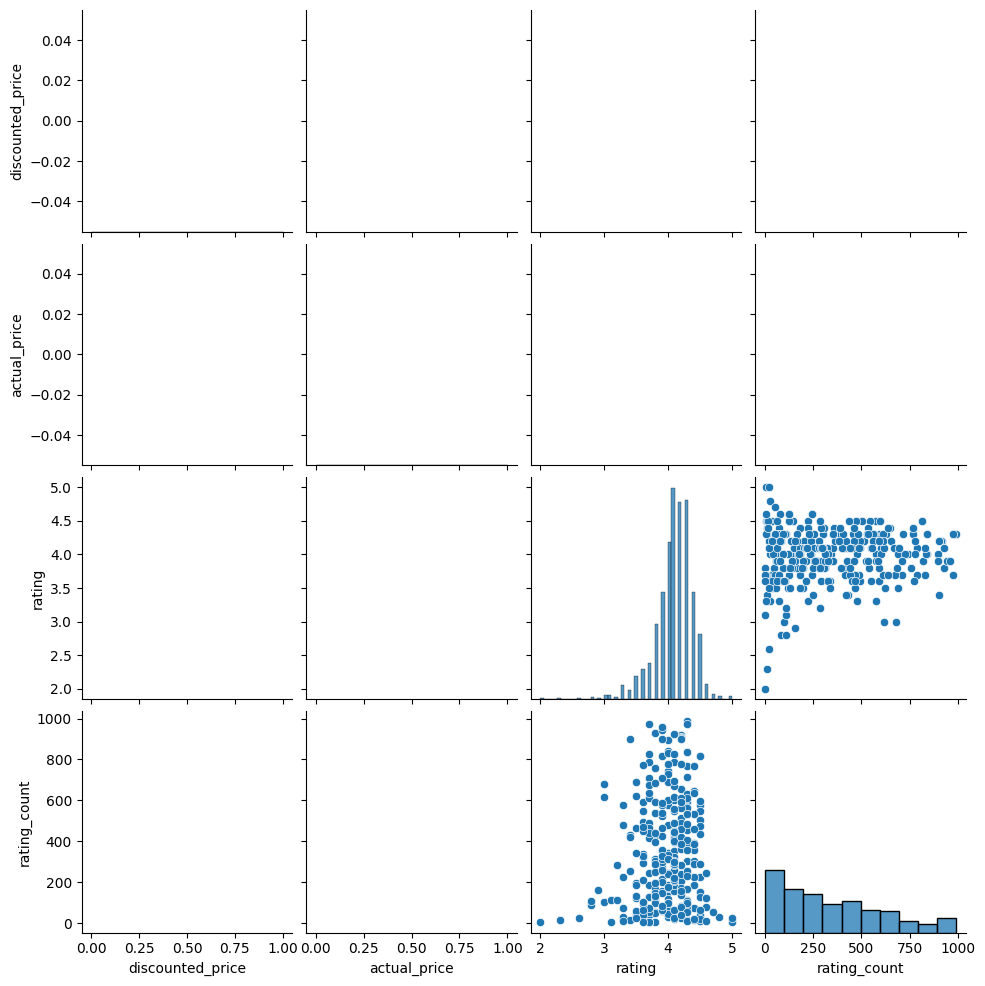

In [36]:
#Que 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_csv("amazon.csv")

# Select numerical columns for the pair plot (replace with your actual columns)
numerical_cols = ['discounted_price', 'actual_price', 'rating', 'rating_count']

# Convert columns to numeric, handling errors
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create the pair plot
sns.pairplot(data[numerical_cols])
plt.show()

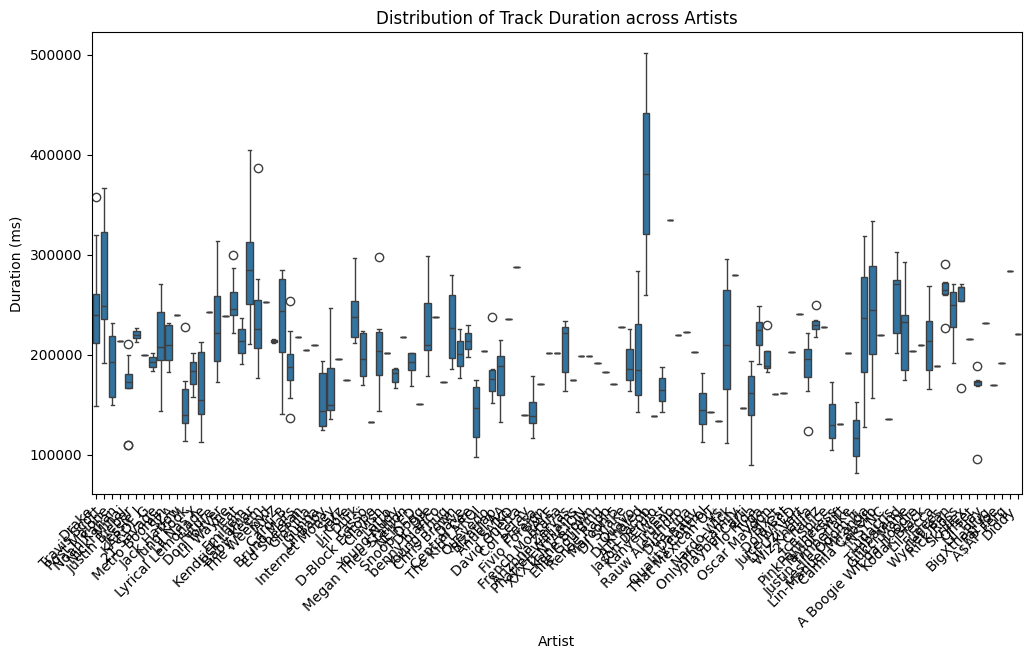

In [37]:
#Que 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot

# Assuming 'data_spotify' DataFrame is already loaded and contains 'Artist', 'Track Name', and 'Duration (ms)' columns.

# Convert 'Duration (ms)' to numeric, handling errors
data_spotify['Duration (ms)'] = pd.to_numeric(data_spotify['Duration (ms)'], errors='coerce')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=data_spotify)
plt.title('Distribution of Track Duration across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

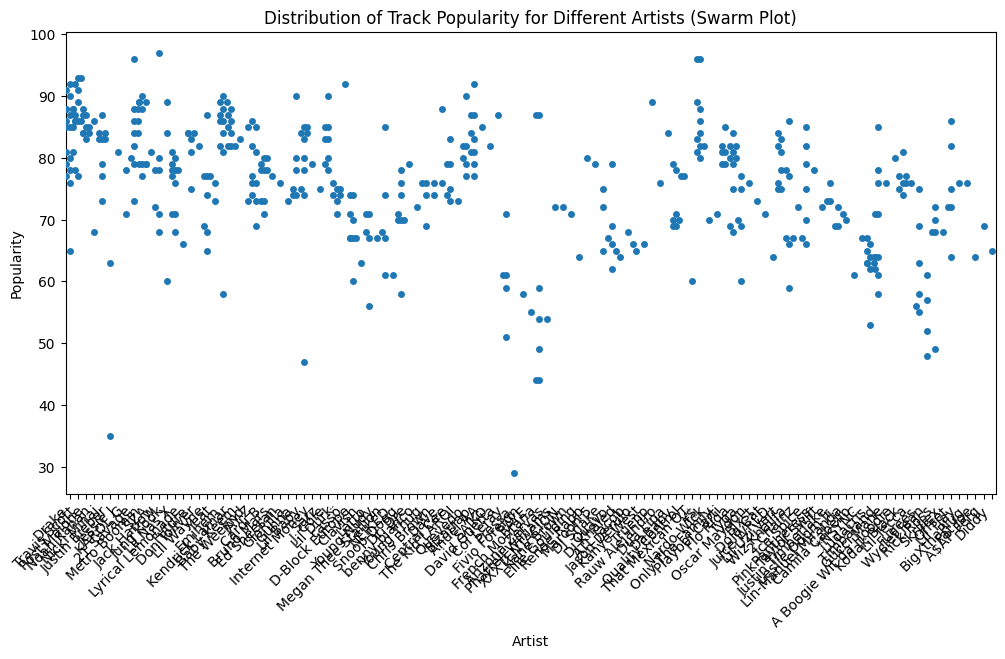

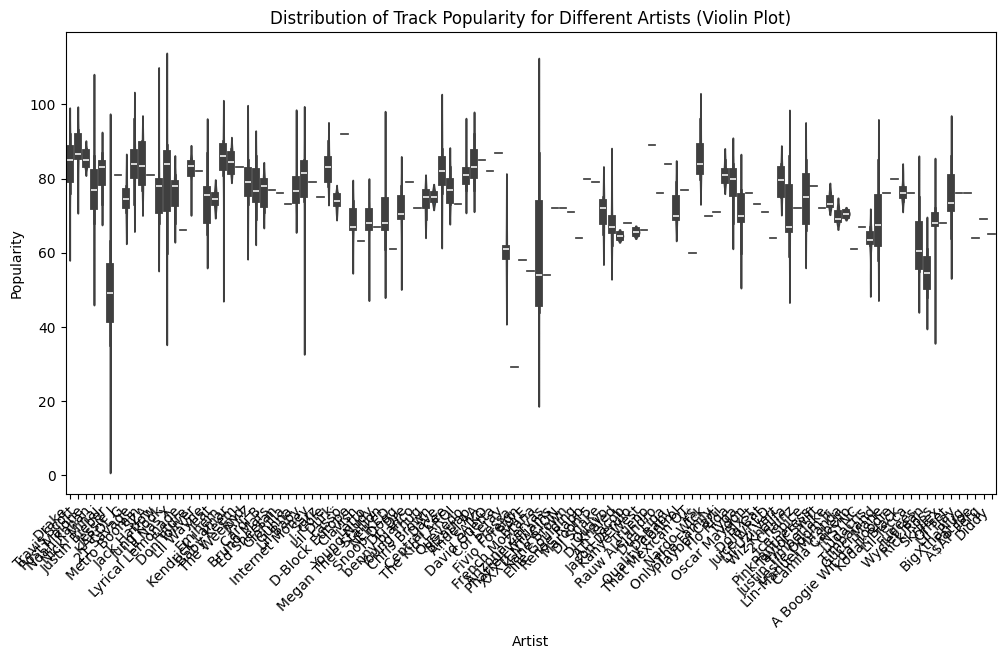

In [38]:
#Que 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_spotify' DataFrame is already loaded and contains 'Popularity' and 'Artist' columns.

# Create the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=data_spotify)
plt.title('Distribution of Track Popularity for Different Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=data_spotify)
plt.title('Distribution of Track Popularity for Different Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.show()